<a href="https://colab.research.google.com/github/Niharika9948/NLP/blob/main/2403A52234_Assignment_5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import nltk
import spacy
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter


In [10]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
df = pd.read_csv("/content/Tweets.csv")

# Keep required columns
df = df[['airline_sentiment', 'text']]
df.head()


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [4]:
tweets = df['text']


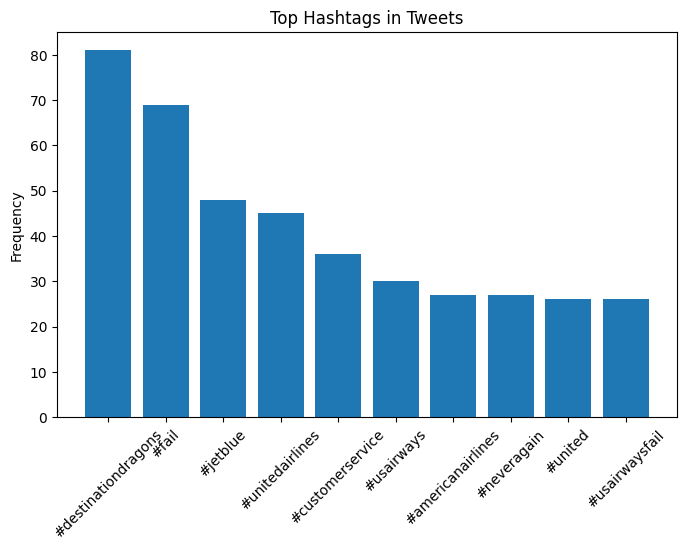

In [5]:
hashtags = []

for tweet in tweets:
    hashtags.extend(re.findall(r"#\w+", tweet.lower()))

hashtag_freq = Counter(hashtags).most_common(10)

labels, values = zip(*hashtag_freq)

plt.figure(figsize=(8,5))
plt.bar(labels, values)
plt.title("Top Hashtags in Tweets")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()


In [6]:
def clean_tweet(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)   # URLs
    text = re.sub(r"@\w+", "", text)             # Mentions
    text = re.sub(r"[^a-z0-9#\s]", "", text)     # Emojis & symbols
    text = re.sub(r"\s+", " ", text).strip()
    return text


In [7]:
df['clean_text'] = df['text'].apply(clean_tweet)
df.head()


,airline_sentiment,text,clean_text
0,neutral,@VirginAmerica What @dhepburn said.,what said
1,positive,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experience...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take another...
3,negative,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious enter...
4,negative,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it


In [11]:
df['tokens'] = df['clean_text'].apply(word_tokenize)
df.head()


,airline_sentiment,text,clean_text,tokens
0,neutral,@VirginAmerica What @dhepburn said.,what said,"[what, said]"
1,positive,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experience...,"[plus, youve, added, commercials, to, the, exp..."
2,neutral,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take another...,"[i, didnt, today, must, mean, i, need, to, tak..."
3,negative,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious enter...,"[its, really, aggressive, to, blast, obnoxious..."
4,negative,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it,"[and, its, a, really, big, bad, thing, about, it]"


In [12]:
stop_words = set(stopwords.words('english'))

df['tokens_no_stopwords'] = df['tokens'].apply(
    lambda tokens: [word for word in tokens if word not in stop_words]
)

df.head()


,airline_sentiment,text,clean_text,tokens,tokens_no_stopwords
0,neutral,@VirginAmerica What @dhepburn said.,what said,"[what, said]",[said]
1,positive,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experience...,"[plus, youve, added, commercials, to, the, exp...","[plus, youve, added, commercials, experience, ..."
2,neutral,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take another...,"[i, didnt, today, must, mean, i, need, to, tak...","[didnt, today, must, mean, need, take, another..."
3,negative,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious enter...,"[its, really, aggressive, to, blast, obnoxious...","[really, aggressive, blast, obnoxious, enterta..."
4,negative,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it,"[and, its, a, really, big, bad, thing, about, it]","[really, big, bad, thing]"


In [13]:
nlp = spacy.load("en_core_web_sm")

def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]


In [14]:
df['lemmas'] = df['tokens_no_stopwords'].apply(lemmatize_tokens)
df.head()


,airline_sentiment,text,clean_text,tokens,tokens_no_stopwords,lemmas
0,neutral,@VirginAmerica What @dhepburn said.,what said,"[what, said]",[said],[say]
1,positive,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experience...,"[plus, youve, added, commercials, to, the, exp...","[plus, youve, added, commercials, experience, ...","[plus, you, ve, add, commercial, experience, t..."
2,neutral,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take another...,"[i, didnt, today, must, mean, i, need, to, tak...","[didnt, today, must, mean, need, take, another...","[do, not, today, must, mean, need, take, anoth..."
3,negative,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious enter...,"[its, really, aggressive, to, blast, obnoxious...","[really, aggressive, blast, obnoxious, enterta...","[really, aggressive, blast, obnoxious, enterta..."
4,negative,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it,"[and, its, a, really, big, bad, thing, about, it]","[really, big, bad, thing]","[really, big, bad, thing]"


In [15]:
df['processed_tweet'] = df['lemmas'].apply(lambda x: " ".join(x))

final_df = df[['airline_sentiment', 'processed_tweet']]
final_df.head()


,airline_sentiment,processed_tweet
0,neutral,say
1,positive,plus you ve add commercial experience tacky
2,neutral,do not today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainmen...
4,negative,really big bad thing
